#Loading data..

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Data1.csv')

 #Inspecting Data..

In [ ]:
print(data.head())
print("-------------------------------------------------------------")
print(data.tail())
print("-------------------------------------------------------------")
print(data.info())
print("-------------------------------------------------------------")
print(data.describe())
print("-------------------------------------------------------------")

   Credit Score  Geography  Gender   Age  Customer Since  Current Account  \
0         553.0      Delhi  Female  45.0             4.0            0.000   
1         447.0  Bengaluru    Male  31.0             7.0            0.000   
2         501.0      Delhi  Female  32.0             2.0            0.000   
3         428.0      Delhi    Male  51.0             3.0            0.000   
4         492.0      Delhi  Female  57.0             6.0      1912681.501   

   Num of products  UPI Enabled  Estimated Yearly Income  Closed  
0              4.0          1.0                 274150.0     0.0  
1              4.0          1.0                 519360.0     0.0  
2              4.0          1.0                 545501.0     0.0  
3              4.0          1.0                  86868.0     0.0  
4              2.0          1.0                 518680.0     0.0  
-------------------------------------------------------------
      Credit Score  Geography  Gender   Age  Customer Since  Current Acco

#Data Cleanning & Preprocessing..

Handle missing values..




In [ ]:
#handle missing values
data.fillna(method="bfill", inplace=True)


<ipython-input-6-a05b6b4e739f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)


Encoding categorical data to numerical


In [ ]:
#convert categorical data to numerical
categorical_cols_data = data.select_dtypes(include=['object']).columns
data=pd.get_dummies(data,columns=categorical_cols_data,drop_first=True)
print(data.head())

   Credit Score       Age  Customer Since  Current Account  Num of products  \
0      0.658477  0.233333           0.500         0.000000              0.4   
1      0.398034  0.116667           0.875         0.000000              0.4   
2      0.530713  0.125000           0.250         0.000000              0.4   
3      0.351351  0.283333           0.375         0.000000              0.4   
4      0.508600  0.333333           0.750         0.479934              0.0   

   UPI Enabled  Estimated Yearly Income  Closed  Geography_Delhi  \
0          1.0                 0.500293     0.0             True   
1          1.0                 0.947826     0.0            False   
2          1.0                 0.995536     0.0             True   
3          1.0                 0.158484     0.0             True   
4          1.0                 0.946585     0.0             True   

   Geography_Mumbai  Gender_Male  
0             False        False  
1             False         True  
2          

Feautre scaling

In [ ]:
#Feautre scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_cols_data = data.select_dtypes(include=['float64','int64']).columns
data[numerical_cols_data]=scaler.fit_transform(data[numerical_cols_data])
print(data.head(), "\n")

   Credit Score       Age  Customer Since  Current Account  Num of products  \
0      0.658477  0.233333           0.500         0.000000              0.4   
1      0.398034  0.116667           0.875         0.000000              0.4   
2      0.530713  0.125000           0.250         0.000000              0.4   
3      0.351351  0.283333           0.375         0.000000              0.4   
4      0.508600  0.333333           0.750         0.479934              0.0   

   UPI Enabled  Estimated Yearly Income  Closed  Geography_Delhi  \
0          1.0                 0.500293     0.0             True   
1          1.0                 0.947826     0.0            False   
2          1.0                 0.995536     0.0             True   
3          1.0                 0.158484     0.0             True   
4          1.0                 0.946585     0.0             True   

   Geography_Mumbai  Gender_Male  
0             False        False  
1             False         True  
2          

Code for Creating the Training Set

In [ ]:
#Code for Creating the Training Set
from sklearn.model_selection import train_test_split
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded=pd.get_dummies(data,columns=categorical_cols,drop_first=True)
from sklearn.preprocessing import MinMaxScaler
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])


Specify the target column (replace 'Target' with the actual column name)

In [ ]:
if 'Credit Score' in data_encoded.columns :
  x=data_encoded.drop('Credit Score',axis=1)
  y=data_encoded['Credit Score']
  x_train, _, y_train, _ = train_test_split(x,y,test_size=0.2 ,random_state=42)
  training_set=pd.concat([x_train,y_train],axis=1)
   # Print the first few rows of the training set
  print("Training Set (first 5 rows):")
  print(training_set.head(), "\n")


Training Set (first 5 rows):
           Age  Customer Since  Current Account  Num of products  UPI Enabled  \
7750  0.158333           0.625         0.432622              0.4          1.0   
2291  0.250000           0.000         0.000000              0.4          1.0   
6220  0.116667           0.125         0.000000              0.0          1.0   
7403  0.233333           0.500         0.466499              0.4          1.0   
5805  0.116667           1.000         0.000000              0.0          1.0   

      Estimated Yearly Income  Closed  Geography_Delhi  Geography_Mumbai  \
7750                 0.758134     0.0            False             False   
2291                 0.005442     0.0            False             False   
6220                 0.901757     0.0            False             False   
7403                 0.308154     0.0            False             False   
5805                 0.401947     0.0            False             False   

      Gender_Male  Credit S

Creating the Testing Set

In [ ]:
#Creating the Testing Set
if 'Credit Score' in data_encoded.columns:
    _, x_test, _, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Save the testing set as separate DataFrames
    testing_set = pd.concat([x_test, y_test], axis=1)

    # Print the first few rows of the testing set
    print("Testing Set (first 5 rows):")
    print(testing_set.head(), "\n")

Testing Set (first 5 rows):
           Age  Customer Since  Current Account  Num of products  UPI Enabled  \
2688  0.175000           0.500         0.481183              0.4          1.0   
4504  0.150000           0.500         0.237987              0.0          1.0   
7136  0.500000           0.625         0.140115              0.0          1.0   
4313  0.116667           0.000         0.000000              0.0          1.0   
3127  0.658333           0.375         0.255863              0.4          1.0   

      Estimated Yearly Income  Closed  Geography_Delhi  Geography_Mumbai  \
2688                 0.574345     0.0            False              True   
4504                 0.584426     0.0            False             False   
7136                 0.416696     1.0            False             False   
4313                 0.185423     0.0            False             False   
3127                 0.166710     1.0            False             False   

      Gender_Male  Credit Sc

#Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

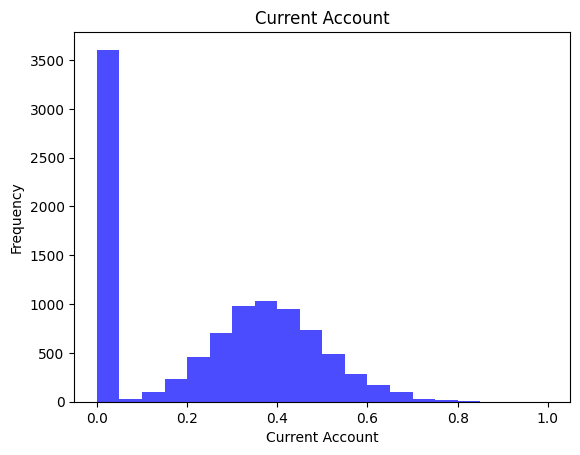

In [ ]:
# Histogram for spending distribution
if 'Current Account' in data.columns:
  data['Current Account'].plot(kind='hist',bins=20,color='blue',alpha=0.7)
  plt.title('Current Account')
  plt.xlabel('Current Account')
  plt.ylabel('Frequency')
  plt.show()

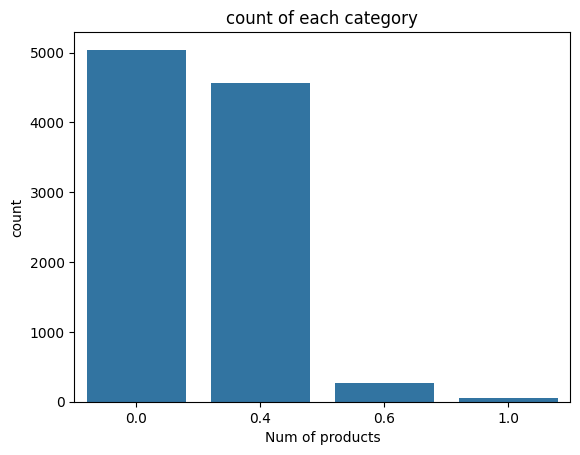

In [ ]:
#Countplot for a categorical column
if 'Num of products' in data.columns:
  sns.countplot(x='Num of products',data=data)
  plt.title('count of each category')
  plt.show()

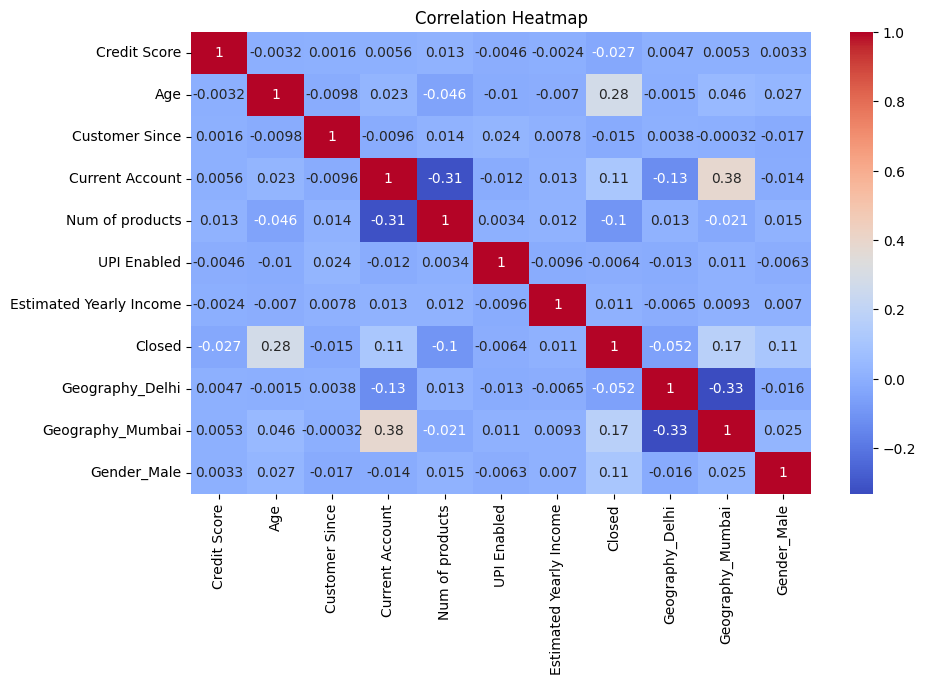

In [ ]:
 #Correlation heatmap
 plt.figure(figsize=(10,6))
 sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
 plt.title('Correlation Heatmap')
 plt.show()

#Import Necessary Libraries for Model Buliding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # Corrected the import statement
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
file2 = '/content/Data1.csv'
data = pd.read_csv(file2)

# Convert categorical columns to numerical
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Normalize numerical data
from sklearn.preprocessing import MinMaxScaler
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Separate features (X) and target (y)
target_column = 'Credit Score'  # Replace 'Target' with your actual target column name
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [ ]:
# Drop rows where the target column 'Closed' contains NaN values
data_cleaned = data.dropna(subset=['Closed'])

# Fill remaining missing values in numerical columns with their mean
numerical_columns = data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())

# Fill remaining missing values in categorical columns with their mode
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])

# Verify if there are any remaining missing values
data_cleaned.info(), data_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 9927 entries, 0 to 9926
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit Score             9927 non-null   float64
 1   Geography                9927 non-null   object 
 2   Gender                   9927 non-null   object 
 3   Age                      9927 non-null   float64
 4   Customer Since           9927 non-null   float64
 5   Current Account          9927 non-null   float64
 6   Num of products          9927 non-null   float64
 7   UPI Enabled              9927 non-null   float64
 8   Estimated Yearly Income  9927 non-null   float64
 9   Closed                   9927 non-null   float64
dtypes: float64(8), object(2)
memory usage: 853.1+ KB


<ipython-input-51-bcbb0604d366>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())
<ipython-input-51-bcbb0604d366>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])


(None,
 Credit Score               0
 Geography                  0
 Gender                     0
 Age                        0
 Customer Since             0
 Current Account            0
 Num of products            0
 UPI Enabled                0
 Estimated Yearly Income    0
 Closed                     0
 dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Encode categorical variables
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Step 2: Define features (X) and target (y)
X = data_cleaned.drop(columns=['Closed'])
y = data_cleaned['Closed']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


<ipython-input-52-362d23653c01>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-52-362d23653c01>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])


(0.8489425981873112,
 array([[1511,   69],
        [ 231,  175]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.87      0.96      0.91      1580\n         1.0       0.72      0.43      0.54       406\n\n    accuracy                           0.85      1986\n   macro avg       0.79      0.69      0.72      1986\nweighted avg       0.84      0.85      0.83      1986\n')

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify the new class distribution
print("Class Distribution After SMOTE:", y_balanced.value_counts())


Class Distribution After SMOTE: Closed
0.0    7899
1.0    7899
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Train-test split with balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


In [ ]:
# Train Random Forest on balanced data
rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate on test data
y_pred_balanced = rf_model_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

accuracy_balanced, conf_matrix_balanced, class_report_balanced


(0.8879746835443038,
 array([[1450,  130],
        [ 224, 1356]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.87      0.92      0.89      1580\n         1.0       0.91      0.86      0.88      1580\n\n    accuracy                           0.89      3160\n   macro avg       0.89      0.89      0.89      3160\nweighted avg       0.89      0.89      0.89      3160\n')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_tuned = best_model.predict(X_test_balanced)
accuracy_tuned = accuracy_score(y_test_balanced, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test_balanced, y_pred_tuned)
class_report_tuned = classification_report(y_test_balanced, y_pred_tuned)

best_params, accuracy_tuned, conf_matrix_tuned, class_report_tuned


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8879746835443038,
 array([[1448,  132],
        [ 222, 1358]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.87      0.92      0.89      1580\n         1.0       0.91      0.86      0.88      1580\n\n    accuracy                           0.89      3160\n   macro avg       0.89      0.89      0.89      3160\nweighted avg       0.89      0.89      0.89      3160\n')

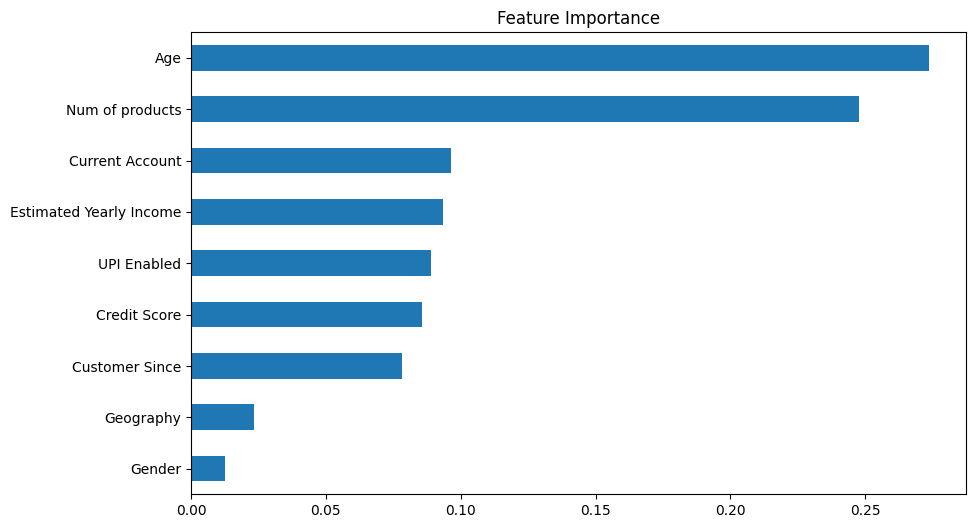

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


=== Final Model Evaluation ===
Accuracy: 0.89

Confusion Matrix:
[[1448  132]
 [ 222 1358]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      1580
         1.0       0.91      0.86      0.88      1580

    accuracy                           0.89      3160
   macro avg       0.89      0.89      0.89      3160
weighted avg       0.89      0.89      0.89      3160


Feature Importance:


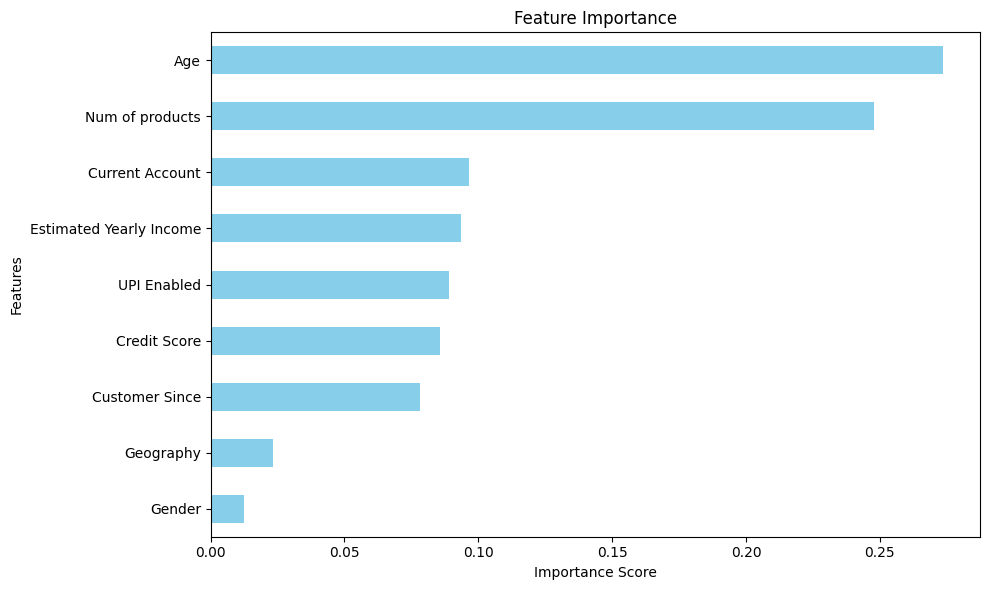

In [ ]:
# Summarize the results
print("=== Final Model Evaluation ===")
print(f"Accuracy: {accuracy_tuned:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix_tuned)

print("\nClassification Report:")
print(class_report_tuned)

# Feature Importance Visualization
import matplotlib.pyplot as plt

print("\nFeature Importance:")
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
